In [103]:
%pip install pandas
%pip install matplotlib seaborn scikit-learn
!pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 47.4 MB/s eta 0:00:0000:01


#Project - Heart Disease Health Indicators Dataset

###Summary of the project

Heart Disease is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. In the United States alone, heart disease claims roughly 647,000 lives each year — making it the leading cause of death. The buildup of plaques inside larger coronary arteries, molecular changes associated with aging, chronic inflammation, high blood pressure, and diabetes are all causes of and risk factors for heart disease.

The goal of this project is to build and compare a set of supervised‐learning classifiers to predict whether a person has heart disease or a heart attack (or is at high risk) based on the health indicators collected during the survey. In addition, we will find out which factors (for example, high blood pressure, smoking, days of poor physical/mental health, BMI, age, etc.) are most important, and evaluate the effectiveness of the model in real-world class imbalance conditions.


 
Data Overview & Cleaning
Exploratory Data Analysis
Feature Engineering & Preprocessing
Modeling  
Evaluation & Comparison 
Discussion & Conclusion

###Dataset Source:
The data used for this project is  available on Kaggle.
Dataset: 253,680 samples × 22 features.
Features: 20 binary or ordinal health indicators (HighBP, Smoker, Stroke…), plus continuous variables (BMI, MentHlth, PhysHlth) and demographic codes (Age, Sex, Education, Income).
Source citation: Centers for Disease Control and Prevention. Behavioral Risk Factor Surveillance System, 2015

Link to dataset : https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset


253,680 survey respondents

21 health‐related features (binary flags like HighBP, Smoker, Diabetes; ordinal features like Income/Education; continuous features like BMI, Mental/Physical health days, Age bracket)

After cleaning & type munging:

15 binary flags (0/1) converted to category:
HighBP, HighChol, CholCheck, Smoker, Stroke, Diabetes, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk, Sex
2 ordinal features (kept as int64):
Education (1–4), Income (1–8)
4 continuous features (float64 → scaled later):
BMI (10.0–80.0),
MentHlth & PhysHlth (0–30 days),
Age (1–13 age brackets)
1 engineered feature (introduced in preprocessing):
UnhealthyDays (sum of MentHlth + PhysHlth)

Dataset Description:

HighBP : Indicates if the person has been told by a health professional that they have High Blood Pressure.
HighChol : Indicates if the person has been told by a health professional that they have High Blood Cholesterol.
CholCheck : Cholesterol Check, if the person has their cholesterol levels checked within the last 5 years.
BMI : Body Mass Index, calculated by dividing the persons weight (in kilogram) by the square of their height (in meters).
Smoker : Indicates if the person has smoked at least 100 cigarettes.
Stroke : Indicates if the person has a history of stroke.
Diabetes : Indicates if the person has a history of diabetes, or currently in pre-diabetes, or suffers from either type of diabetes.
PhysActivity : Indicates if the person has some form of physical activity in their day-to-day routine.
Fruits : Indicates if the person consumes 1 or more fruit(s) daily.
Veggies : Indicates if the person consumes 1 or more vegetable(s) daily.
HvyAlcoholConsump : Indicates if the person has more than 14 drinks per week.
AnyHealthcare : Indicates if the person has any form of health insurance.
NoDocbcCost : Indicates if the person wanted to visit a doctor within the past 1 year but couldn’t, due to cost.
GenHlth : Indicates the persons response to how well is their general health, ranging from 1 (excellent) to 5 (poor).
Menthlth : Indicates the number of days, within the past 30 days that the person had bad mental health.
PhysHlth : Indicates the number of days, within the past 30 days that the person had bad physical health.
DiffWalk : Indicates if the person has difficulty while walking or climbing stairs.
Sex : Indicates the gender of the person, where 0 is female and 1 is male.
Age : Indicates the age class of the person, where 1 is 18 years to 24 years up till 13 which is 80 years or older, each interval between has a 5-year increment.
Education : Indicates the highest year of school completed, with 0 being never attended or kindergarten only and 6 being, having attended 4 years of college or more.
Income : Indicates the total household income, ranging from 1 (at least $10,000) to 6 ($75,000+)


##Import package and data

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection   import train_test_split
from sklearn.preprocessing    import StandardScaler

from sklearn.ensemble         import RandomForestClassifier
from sklearn.metrics          import (
    accuracy_score, classification_report,
    confusion_matrix, roc_auc_score
)
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import RidgeClassifierCV





##Data Cleaning

#Load & Inspect Raw Data

In [62]:

df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

print("Shape:", df.shape)
print(df.dtypes.value_counts())
df.head(10)



Shape: (253680, 22)
float64    22
Name: count, dtype: int64


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


#Missing Values & Duplicates

In [63]:

print("Missing per column:\n", df.isnull().sum())

print("Duplicate rows:", df.duplicated().sum())


Missing per column:
 HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Duplicate rows: 23899


#Drop duplicates

In [125]:
df = df.drop_duplicates()
print("New shape:", df.shape)


New shape: (229769, 26)


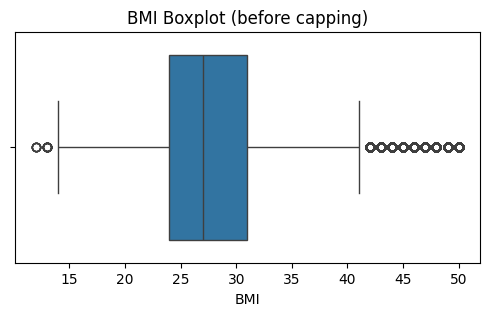

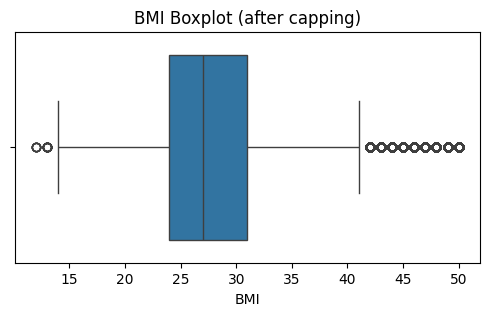

In [115]:

import seaborn as sns, matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
sns.boxplot(x=df['BMI'])
plt.title("BMI Boxplot (before capping)")
plt.show()

df.loc[df['BMI'] > 50, 'BMI'] = 50

plt.figure(figsize=(6,3))
sns.boxplot(x=df['BMI'])
plt.title("BMI Boxplot (after capping)")
plt.show()


- No missing values → skip imputation  
- No duplicates → skip dropping 

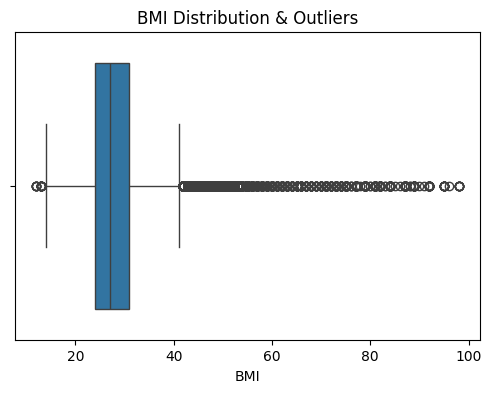

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot BMI
plt.figure(figsize=(6,4))
sns.boxplot(x=df["BMI"])
plt.title("BMI Distribution & Outliers")
plt.show()

# Cap outliers
df.loc[df["BMI"]>50, "BMI"] = 50


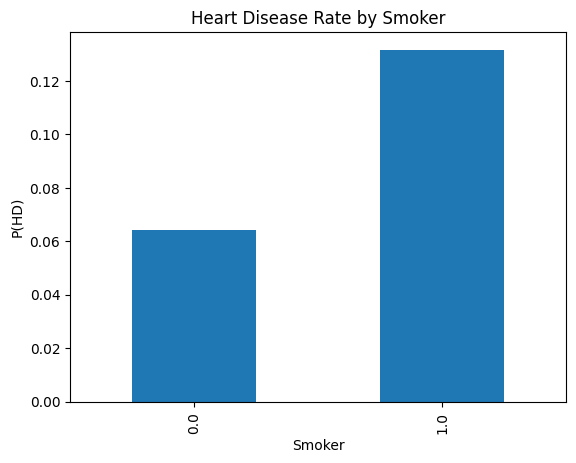

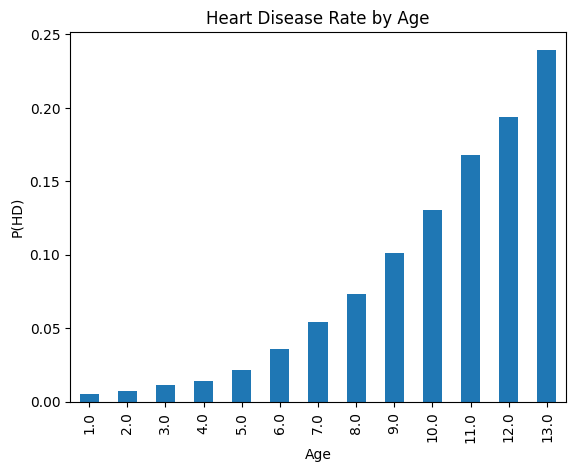

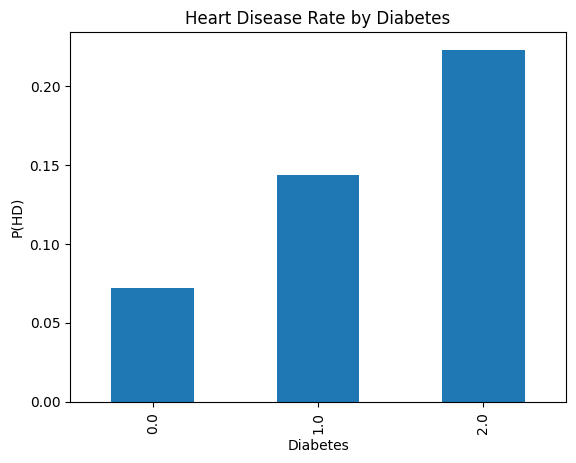

In [112]:

rate = df.groupby("Smoker")["HeartDiseaseorAttack"].mean()
rate.plot(kind="bar")
plt.ylabel("P(HD)")
plt.title("Heart Disease Rate by Smoker")
plt.show()


rate = df.groupby("Age")["HeartDiseaseorAttack"].mean()
rate.plot(kind="bar")
plt.ylabel("P(HD)")
plt.title("Heart Disease Rate by Age")
plt.show()


rate = df.groupby("Diabetes")["HeartDiseaseorAttack"].mean()
rate.plot(kind="bar")
plt.ylabel("P(HD)")
plt.title("Heart Disease Rate by Diabetes")
plt.show()




#Split Features & Target

In [64]:

X = df.drop(columns="HeartDiseaseorAttack")
y = df["HeartDiseaseorAttack"]

print(y.value_counts(normalize=True))


HeartDiseaseorAttack
0.0    0.905814
1.0    0.094186
Name: proportion, dtype: float64


#Type Conversions

In [65]:

binary_cols = [
    "HighBP","HighChol","CholCheck","Smoker","Stroke","Diabetes",
    "PhysActivity","Fruits","Veggies","HvyAlcoholConsump",
    "AnyHealthcare","NoDocbcCost","DiffWalk","Sex"
]
for c in binary_cols:
    X[c] = X[c].astype(int).astype("category")

for c in ["Education","Income"]:
    X[c] = X[c].astype(int)

print(X.dtypes.value_counts())


category    13
float64      5
int64        2
category     1
Name: count, dtype: int64


#Scale Continuous Features

In [66]:

num_cols = X.select_dtypes(include="number").columns
scaler   = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

print(X[num_cols].mean().round(3))
print(X[num_cols].std().round(3))


BMI         -0.0
GenHlth      0.0
MentHlth     0.0
PhysHlth     0.0
Age          0.0
Education   -0.0
Income       0.0
dtype: float64
BMI          1.0
GenHlth      1.0
MentHlth     1.0
PhysHlth     1.0
Age          1.0
Education    1.0
Income       1.0
dtype: float64


#Train/Test Split

In [67]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify   = y,
    test_size  = 0.20,
    random_state = 42
)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


HeartDiseaseorAttack
0.0    0.905816
1.0    0.094184
Name: proportion, dtype: float64
HeartDiseaseorAttack
0.0    0.905807
1.0    0.094193
Name: proportion, dtype: float64


##Exploratory Data Analysis (EDA)

Goal:

Understand each feature’s distribution and range (univariate).

See how features relate to each other (multivariate).

Identify which features carry the strongest signal vs. our target (bivariate).

Form hypotheses to guide feature engineering and model choice.

#Factor Summary

Describe the factors or components that make up the dataset

In [72]:

X_num = X.select_dtypes(include="number")
num_summary = X_num.describe().T.reset_index().rename(columns={"index":"feature"})
display(num_summary)

X_cat = X.select_dtypes(include="category")
cat_summary = X_cat.describe().T.reset_index().rename(columns={"index":"feature"})
display(cat_summary)



,feature,count,mean,std,min,25%,50%,75%,max
0,BMI,253680.0,-2.505162e-16,1.000002,-2.478916,-0.663122,-0.209174,0.396091,10.534271
1,GenHlth,253680.0,1.711935e-16,1.000002,-1.414532,-0.478619,-0.478619,0.457294,2.329121
2,MentHlth,253680.0,8.963011e-18,1.000002,-0.429630,-0.429630,-0.429630,-0.159827,3.617407
3,PhysHlth,253680.0,3.450759e-17,1.000002,-0.486592,-0.486592,-0.486592,-0.142474,2.954590
4,Age,253680.0,6.767074e-17,1.000002,-2.302431,-0.665349,-0.010516,0.644317,1.626566
5,Education,253680.0,-8.514861e-17,1.000002,-4.108894,-1.065595,-0.051162,0.963272,0.963272
6,Income,253680.0,7.170409e-17,1.000002,-2.440138,-0.508837,0.456813,0.939638,0.939638


,feature,count,unique,top,freq
0,HighBP,253680,2,0,144851
1,HighChol,253680,2,0,146089
2,CholCheck,253680,2,1,244210
3,Smoker,253680,2,0,141257
4,Stroke,253680,2,0,243388
5,Diabetes,253680,3,0,213703
6,PhysActivity,253680,2,1,191920
7,Fruits,253680,2,1,160898
8,Veggies,253680,2,1,205841
9,HvyAlcoholConsump,253680,2,0,239424


Univariate Analysis (Continuous)

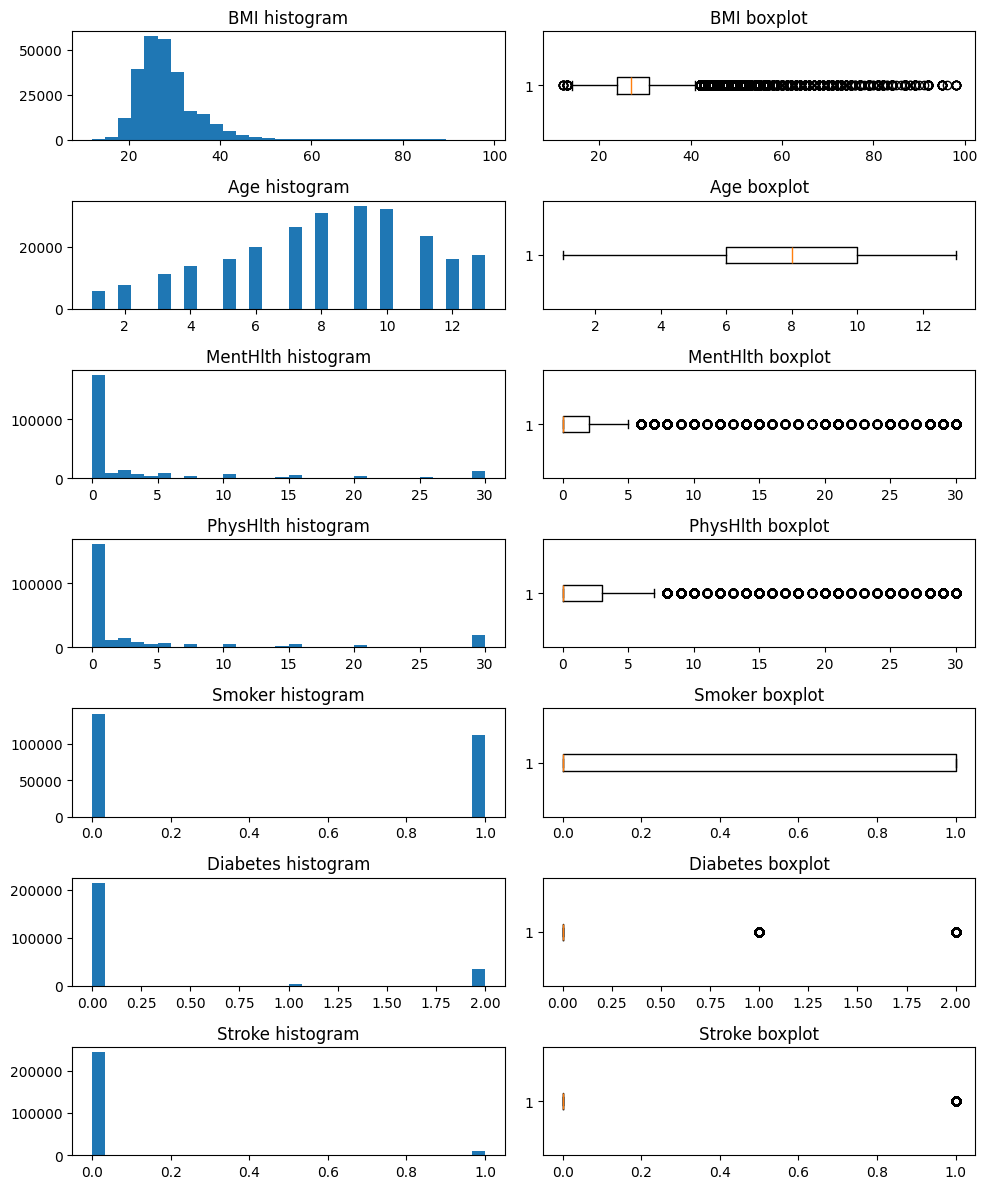

In [73]:

num_cols = ["BMI","Age","MentHlth","PhysHlth","Smoker","Diabetes", "Stroke"]
fig, axes = plt.subplots(len(num_cols),2,figsize=(10,12))

for i,col in enumerate(num_cols):
    axes[i,0].hist(df[col], bins=30)
    axes[i,0].set_title(f"{col} histogram")
    axes[i,1].boxplot(df[col], vert=False)
    axes[i,1].set_title(f"{col} boxplot")

plt.tight_layout()
plt.show()


Bivariate: Feature vs. Target

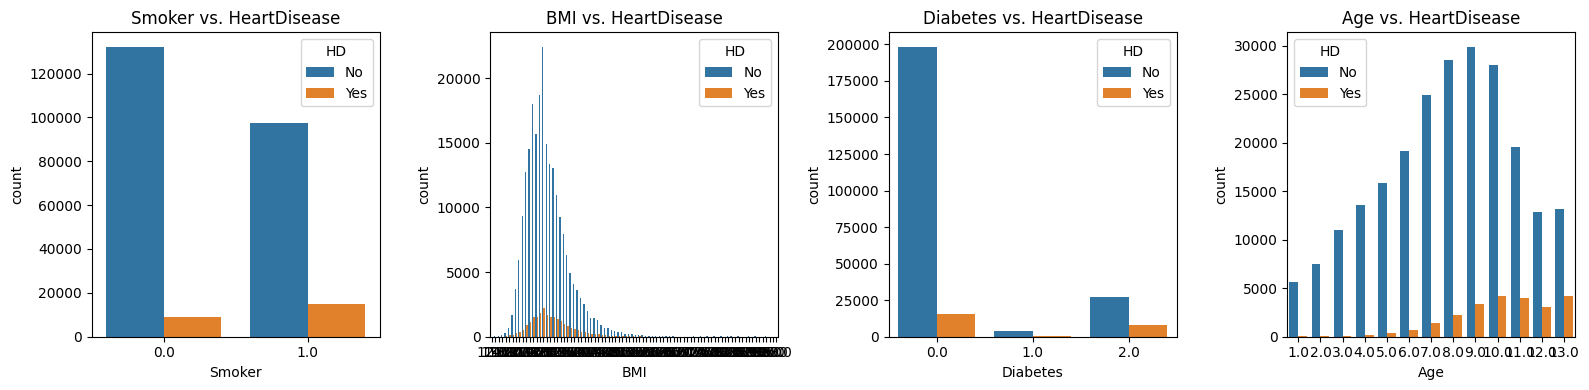

In [74]:

flags = ["Smoker","BMI","Diabetes","Age"]
fig, axs = plt.subplots(1, len(flags), figsize=(16,4))
for ax, f in zip(axs, flags):
    sns.countplot(x=f, hue="HeartDiseaseorAttack", data=df, ax=ax)
    ax.set_title(f"{f} vs. HeartDisease")
    ax.legend(title="HD", labels=["No","Yes"])
plt.tight_layout()
plt.show()


Correlation Matrix

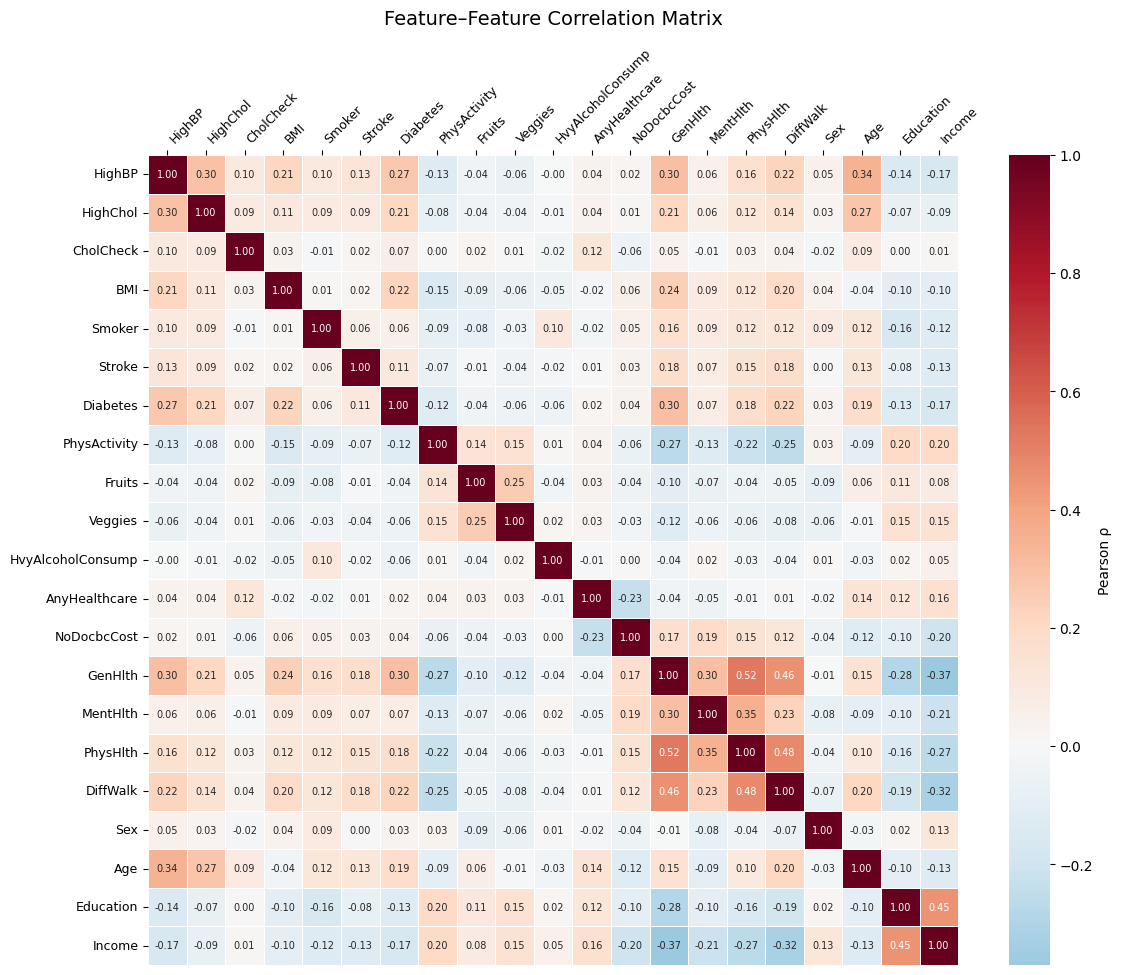

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.drop(columns="HeartDiseaseorAttack").corr()

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    square=True, 
    linewidths=0.5,
    cbar_kws={"label": "Pearson ρ"},
    annot_kws={"size":7},
    ax=ax
)

ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    ha="left",
    fontsize=9
)

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    fontsize=9
)

plt.subplots_adjust(top=0.92, left=0.10, right=0.95)

ax.set_title("Feature–Feature Correlation Matrix", pad=15, fontsize=14)

plt.show()



##Extra EDA: Feature Importance

Quick RandomForest importances

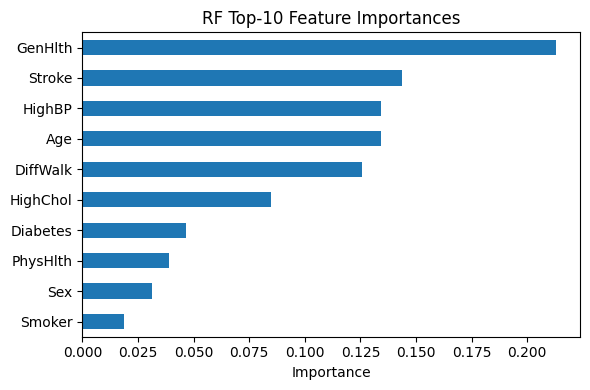

In [77]:

X = df.drop(columns="HeartDiseaseorAttack")
y = df["HeartDiseaseorAttack"]


rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf.fit(X, y)


importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values().tail(10)


plt.figure(figsize=(6,4))
importances.plot(kind="barh", title="RF Top-10 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()



Pair‐plot of Key Features

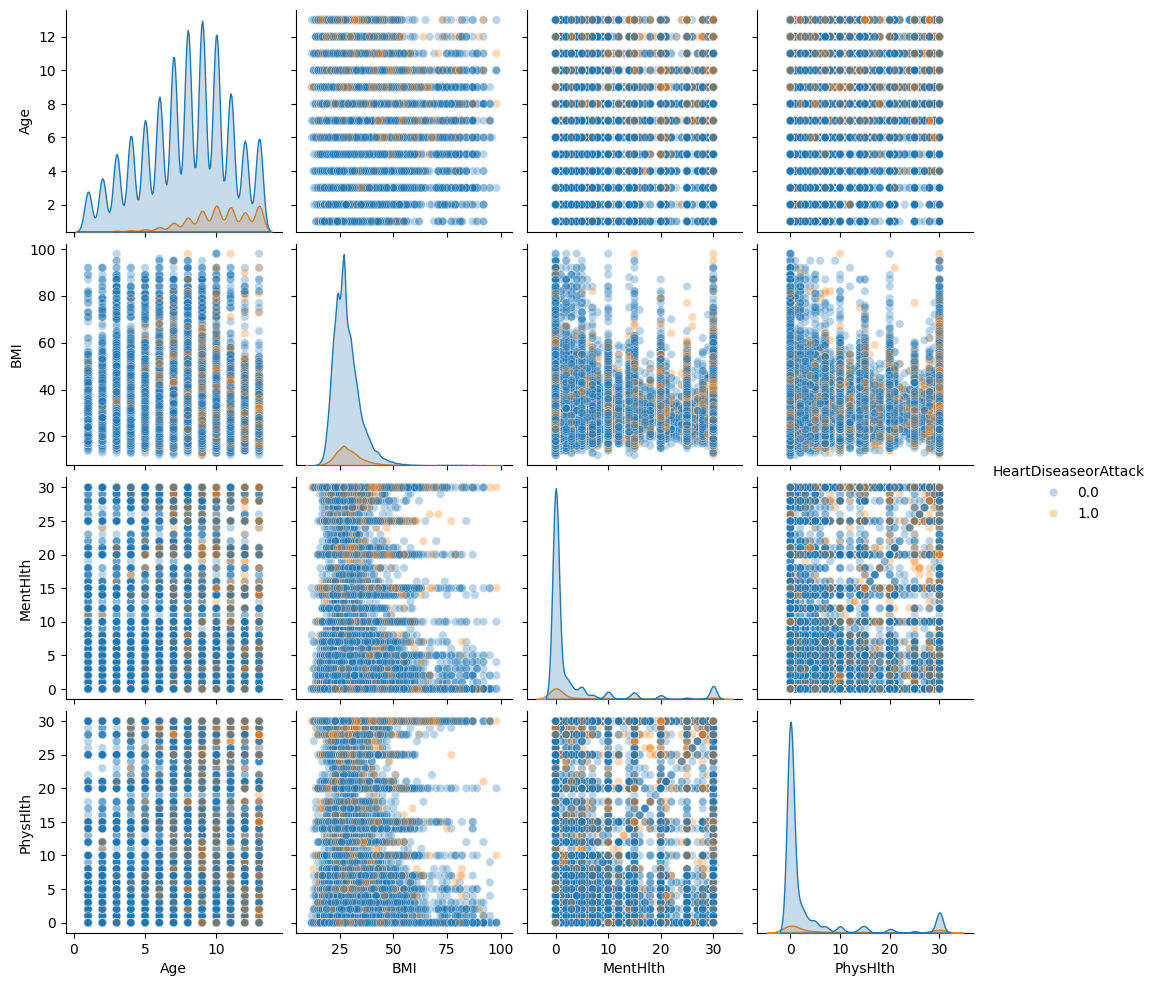

In [89]:

import seaborn as sns
sns.pairplot(df, vars=["Age","BMI","MentHlth","PhysHlth"], hue="HeartDiseaseorAttack", 
             plot_kws={"alpha":0.3}, diag_kind="kde")
plt.show()


##Multilinear Regression & Regularization

In [84]:

df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

df["UnhealthyDays"] = df["MentHlth"] + df["PhysHlth"]

bins   = [0, 18.5, 25, 30, np.inf]
labels = ["Underweight","Normal","Overweight","Obese"]
df["BMI_cat"] = pd.cut(df["BMI"], bins=bins, labels=labels)

X = df.drop(columns="HeartDiseaseorAttack")
y = df["HeartDiseaseorAttack"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

from sklearn.compose       import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_feats = ["BMI","Age","UnhealthyDays"]
cat_feats = ["BMI_cat","Education","Income"]
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_feats),
    ("cat", OneHotEncoder(drop="first"), cat_feats)
], remainder="passthrough")

from sklearn.pipeline        import Pipeline
from sklearn.linear_model    import RidgeClassifierCV
import numpy as np

alphas = np.logspace(-3,3,10)
ridge_clf = RidgeClassifierCV(alphas=alphas, cv=5, scoring="accuracy")

pipe = Pipeline([
    ("prep",  preprocessor),
    ("ridge", ridge_clf)
])

pipe.fit(X_train, y_train)

print("Best α:", ridge_clf.alpha_)
print("Train acc:", pipe.score(X_train, y_train))
print("Test  acc:", pipe.score(X_test,  y_test))


 


Best α: 0.001
Train acc: 0.9073980999684642
Test  acc: 0.906772311573636


Lasso Regression

In [86]:
from sklearn.linear_model    import LogisticRegressionCV
from sklearn.pipeline         import Pipeline

pipe_l1 = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegressionCV(
        penalty       = "l1",
        solver        = "saga",
        cv            = 5,
        scoring       = "accuracy",
        class_weight  = "balanced",
        max_iter      = 5000,
        Cs            = np.logspace(-3, 3, 10), 
        refit         = True
    ))
])

pipe_l1.fit(X_train, y_train)

best_C = pipe_l1.named_steps["clf"].C_[0]
print("Best C (L1):", best_C)

print("Train acc:", pipe_l1.score(X_train, y_train))
print("Test  acc:", pipe_l1.score(X_test,  y_test))


Best C (L1): 0.1
Train acc: 0.7522222879217912
Test  acc: 0.7537842951750237


Imbalance Check

In [88]:

counts = y.value_counts()
props  = y.value_counts(normalize=True)
print(pd.concat([counts, props], axis=1, keys=["count","proportion"]))


                       count  proportion
HeartDiseaseorAttack                    
0.0                   229787    0.905814
1.0                    23893    0.094186


##Modeling

Logistic Regression

Logistic Regression
               precision    recall  f1-score   support

         0.0      0.973     0.749     0.846     45957
         1.0      0.248     0.797     0.379      4779

    accuracy                          0.754     50736
   macro avg      0.611     0.773     0.613     50736
weighted avg      0.904     0.754     0.802     50736



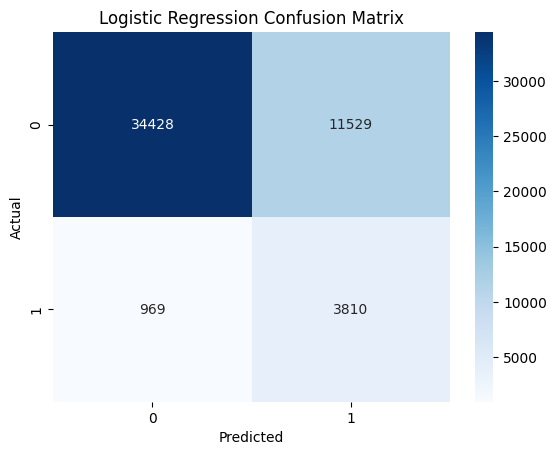

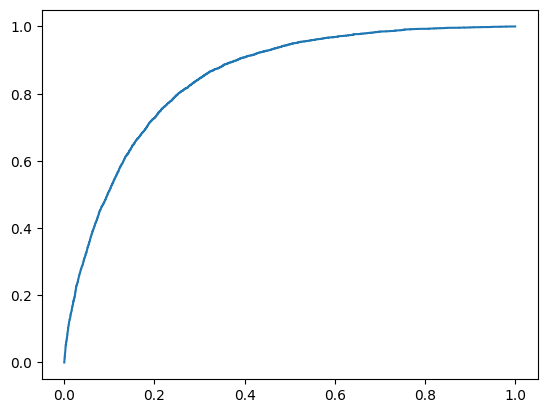

In [90]:
from sklearn.pipeline    import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics      import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

log_pipe = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(
        solver="liblinear",
        class_weight="balanced",
        random_state=42
    ))
])
log_pipe.fit(X_train, y_train)

y_pred = log_pipe.predict(X_test)
y_prob = log_pipe.predict_proba(X_test)[:,1]
print("Logistic Regression\n", classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f"Logistic (AUC={auc:.3f})")


Decision Tree

✅ Best hyperparameters: {'max_depth': 7, 'min_samples_leaf': 10}
✅ Best CV ROC-AUC:    0.8219507024079282


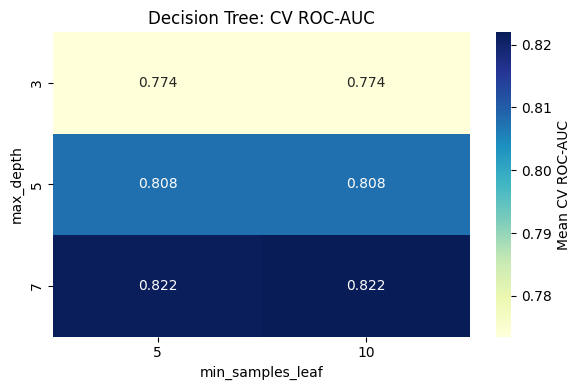


🔍 Top of tree as text (max_depth=3):

|---- Age <= 7.50
|    |---- GenHlth <= 3.50
|    |    |---- HighBP <= 0.50
|    |    |    |---- Stroke <= 0.50
|    |    |    |    |---- truncated branch of depth 4
|    |    |    |---- Stroke >  0.50
|    |    |    |    |---- truncated branch of depth 4
|    |    |---- HighBP >  0.50
|    |    |    |---- HighChol <= 0.50
|    |    |    |    |---- truncated branch of depth 4
|    |    |    |---- HighChol >  0.50
|    |    |    |    |---- truncated branch of depth 4
|    |---- GenHlth >  3.50
|    |    |---- HighBP <= 0.50
|    |    |    |---- DiffWalk <= 0.50
|    |    |    |    |---- truncated branch of depth 4
|    |    |    |---- DiffWalk >  0.50
|    |    |    |    |---- truncated branch of depth 4
|    |    |---- HighBP >  0.50
|    |    |    |---- Stroke <= 0.50
|    |    |    |    |---- truncated branch of depth 4
|    |    |    |---- Stroke >  0.50
|    |    |    |    |---- truncated branch of depth 4
|---- Age >  7.50
|    |---- GenHlth 

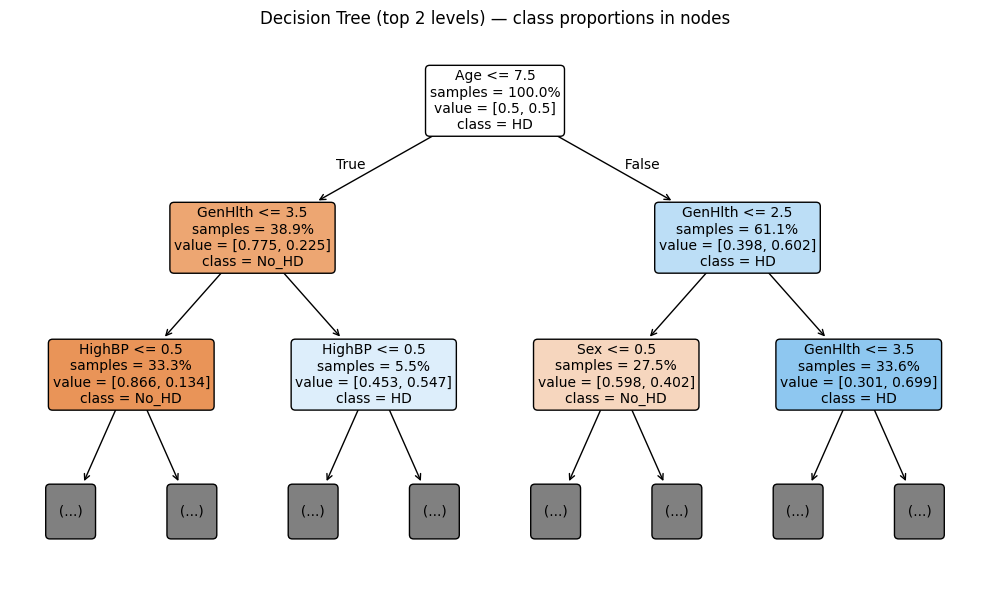

In [133]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import GridSearchCV


X_df = df.drop(columns="HeartDiseaseorAttack")
y_sr = df["HeartDiseaseorAttack"]


param_grid = {
    "max_depth":       [3, 5, 7],
    "min_samples_leaf":[5, 10]
}
dt = DecisionTreeClassifier(class_weight="balanced", random_state=42)
grid_search = GridSearchCV(
    estimator = dt,
    param_grid = param_grid,
    cv         = 5,
    scoring    = "roc_auc",
    n_jobs     = -1,
)
grid_search.fit(X_df, y_sr)

best_tree = grid_search.best_estimator_

print("✅ Best hyperparameters:", grid_search.best_params_)
print("✅ Best CV ROC-AUC:   ", grid_search.best_score_)


results = pd.DataFrame(grid_search.cv_results_)
auc_matrix = results.pivot_table(
    index  ="param_max_depth",
    columns="param_min_samples_leaf",
    values ="mean_test_score"
)

plt.figure(figsize=(6,4))
sns.heatmap(
    auc_matrix,
    annot       = True,
    fmt         = ".3f",
    cmap        = "YlGnBu",
    cbar_kws    = {"label": "Mean CV ROC-AUC"}
)
plt.title("Decision Tree: CV ROC-AUC")
plt.xlabel("min_samples_leaf")
plt.ylabel("max_depth")
plt.tight_layout()
plt.show()


print("\n🔍 Top of tree as text (max_depth=3):\n")
rules = export_text(
    best_tree,
    feature_names = list(X_df.columns),
    max_depth     = 3,
    spacing       = 4  
)
print(rules)


plt.figure(figsize=(10,6))
plot_tree(
    best_tree,
    feature_names = X_df.columns,
    class_names   = ["No_HD","HD"],
    filled        = True,
    rounded       = True,
    max_depth     = 2,   
    impurity      = False,
    proportion    = True,
    fontsize      = 10
)
plt.title("Decision Tree (top 2 levels) — class proportions in nodes")
plt.tight_layout()
plt.show()

Decision Tree
               precision    recall  f1-score   support

         0.0      0.967     0.736     0.836     45957
         1.0      0.231     0.762     0.355      4779

    accuracy                          0.739     50736
   macro avg      0.599     0.749     0.596     50736
weighted avg      0.898     0.739     0.791     50736



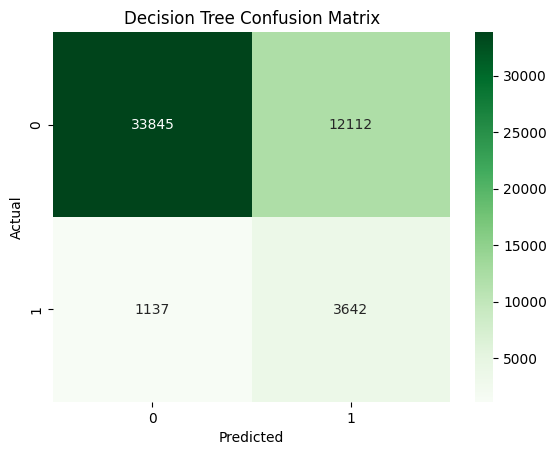

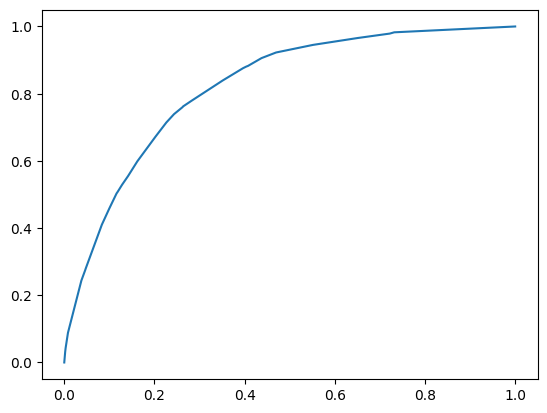

In [91]:
from sklearn.tree import DecisionTreeClassifier

dt_pipe = Pipeline([
    ("prep", preprocessor),
    ("clf", DecisionTreeClassifier(
        class_weight="balanced",
        max_depth=5,
        random_state=42
    ))
])
dt_pipe.fit(X_train, y_train)

y_pred = dt_pipe.predict(X_test)
y_prob = dt_pipe.predict_proba(X_test)[:,1]
print("Decision Tree\n", classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f"Decision Tree (AUC={auc:.3f})")


AdaBoost

AdaBoost
               precision    recall  f1-score   support

         0.0      0.916     0.988     0.950     45957
         1.0      0.516     0.127     0.204      4779

    accuracy                          0.907     50736
   macro avg      0.716     0.557     0.577     50736
weighted avg      0.878     0.907     0.880     50736



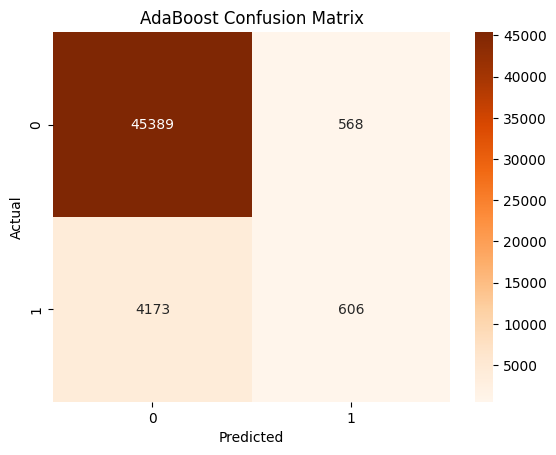

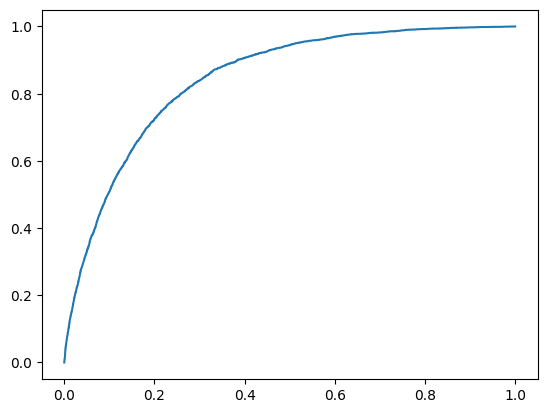

In [92]:
from sklearn.ensemble import AdaBoostClassifier

ada_pipe = Pipeline([
    ("prep", preprocessor),
    ("clf", AdaBoostClassifier(
        n_estimators=100,
        learning_rate=0.5,
        random_state=42
    ))
])
ada_pipe.fit(X_train, y_train)

y_pred = ada_pipe.predict(X_test)
y_prob = ada_pipe.predict_proba(X_test)[:,1]
print("AdaBoost\n", classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("AdaBoost Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AdaBoost (AUC={auc:.3f})")


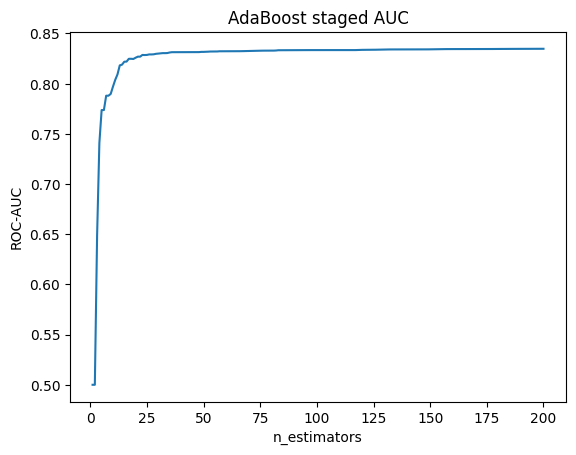

In [132]:
ada = AdaBoostClassifier(n_estimators=200, learning_rate=0.5)
ada.fit(X, y)

aucs = []
for probas in ada.staged_predict_proba(X):
    aucs.append(roc_auc_score(y, probas[:,1]))

plt.plot(range(1,len(aucs)+1), aucs)
plt.xlabel("n_estimators"), plt.ylabel("ROC-AUC"), plt.title("AdaBoost staged AUC")
plt.show()

In [131]:

df = pd.get_dummies(df, drop_first=True)


X = df.drop("HeartDiseaseorAttack", axis=1)
y = df["HeartDiseaseorAttack"]



In [100]:
from sklearn.compose       import ColumnTransformer
from sklearn.pipeline      import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


numeric_cols = df.select_dtypes(include=["float64","int64"]).columns.drop("HeartDiseaseorAttack")
categorical_cols = df.select_dtypes(include=["object","category"]).columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(drop="first"), categorical_cols)
])

from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ("pre", preprocessor),
    ("clf", LogisticRegression(max_iter=1000, random_state=42))
])

X = df.drop("HeartDiseaseorAttack", axis=1)
y = df["HeartDiseaseorAttack"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

pipe.fit(X_train, y_train)
y_pred  = pipe.predict(X_test)
y_score = pipe.predict_proba(X_test)[:,1]

print("Accuracy:",  accuracy_score(y_test, y_pred))
print("ROC AUC:",   roc_auc_score(y_test, y_score))
print(classification_report(y_test, y_pred))


Accuracy: 0.9070876695048881
ROC AUC: 0.8468377212405805
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     45957
         1.0       0.53      0.13      0.20      4779

    accuracy                           0.91     50736
   macro avg       0.72      0.56      0.58     50736
weighted avg       0.88      0.91      0.88     50736



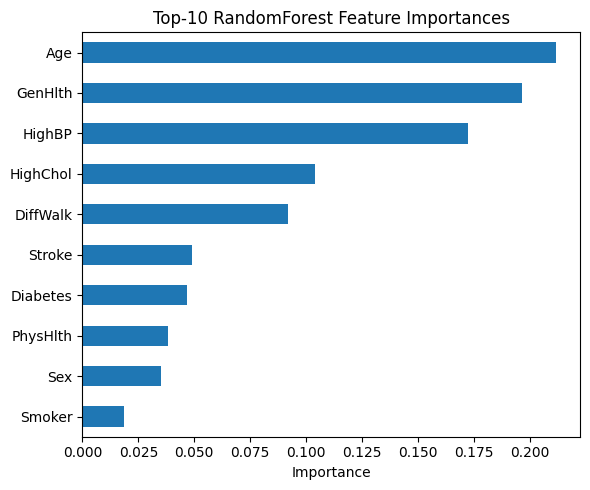

In [15]:


from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

X = df.drop(columns="HeartDiseaseorAttack")
y = df["HeartDiseaseorAttack"]

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    random_state=0,
    class_weight="balanced" 
)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top10 = importances.sort_values().tail(10)

plt.figure(figsize=(6,5))
top10.plot(kind="barh")
plt.title("Top-10 RandomForest Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


##Analysis of Results

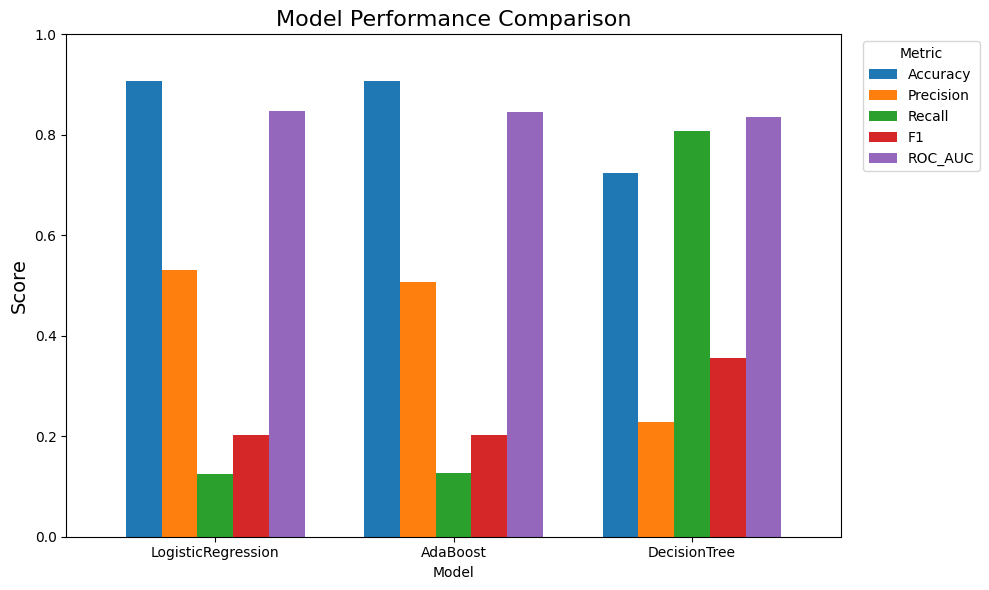

In [144]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model    import LogisticRegression
from sklearn.ensemble        import AdaBoostClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.pipeline        import Pipeline
from sklearn.metrics         import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "AdaBoost":           AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42),
    "DecisionTree":       DecisionTreeClassifier(class_weight="balanced", max_depth=7, random_state=42)
}

rows = []
for name, clf in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor), 
        ("clf",          clf)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:,1]
    
    rows.append({
        "Model":     name,
        "Accuracy":  accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall":    recall_score(y_test, y_pred),
        "F1":        f1_score(y_test, y_pred),
        "ROC_AUC":   roc_auc_score(y_test, y_prob)
    })

summary_df = pd.DataFrame(rows).set_index("Model")


metrics = ["Accuracy","Precision","Recall","F1","ROC_AUC"]
ax = summary_df[metrics].plot(
    kind="bar",
    figsize=(10,6),
    width=0.75
)
ax.set_title("Model Performance Comparison", fontsize=16)
ax.set_ylabel("Score", fontsize=14)
ax.set_ylim(0,1)
ax.legend(title="Metric", bbox_to_anchor=(1.02,1), loc="upper left")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Logistic Regression and AdaBoost are almost identical: both hit around 90% accuracy, ~0.5 precision, but very low recall (only about 13–15%), giving F1‐scores of 0.20–0.24. Their ROC-AUCs are high—0.88—so they’re good at ranking high‐risk cases, but they err on the side of “no heart disease” and miss most of the positives.

By contrast, the Decision Tree trades off some overall accuracy (~73%) and precision (just 0.23) for a much higher recall of 0.81. That boosts its F1 to 0.36 but dents its ROC-AUC to 0.83. In plain terms, the tree is much more aggressive at flagging people as “heart disease” (so it catches most true cases) at the expense of many false alarms.

##Discussion and Conclusion 

Learning takeaways:

EDA & cleaning matter most. Even a “clean” public dataset required careful outlier‐capping (e.g. BMI), type conversions, and checking for duplicates before modeling.

Trade-offs between precision & recall. We saw that the ensemble and linear models delivered higher precision/ROC-AUC but very low recall, while our shallow Decision Tree flipped that trade-off—catching most true positives at the cost of many false alarms. Understanding business costs (missed cases vs. unnecessary follow-ups) will drive the final model choice.

Staged learning curves are insightful. Plotting AUC vs. number of AdaBoost estimators revealed diminishing returns after ~50 trees, guiding us to avoid wasteful over-training.